#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Visualization and Cleaning

In [ ]:
# Reading csv file
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/cyberbullying_tweets.csv')

In [ ]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None


In [ ]:
data = data.rename(columns={'tweet_text' : 'tweet', 'cyberbullying_type' : 'sentiment'})

Removing duplicates from given tweets.


In [ ]:
data[data.duplicated()].shape

(36, 2)

In [ ]:
data = data[~data.duplicated()]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      47656 non-null  object
 1   sentiment  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


Showing class balance/imbalance result

In [ ]:
data.sentiment.value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: sentiment, dtype: int64

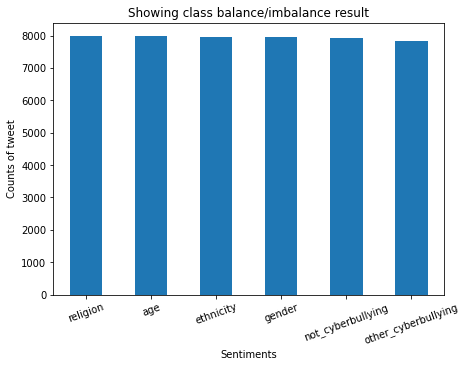

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Showing class balance/imbalance result');
data['sentiment'].value_counts().plot.bar(rot = 20);
plt.xlabel('Sentiments');
plt.ylabel('Counts of tweet');
plt.show();

From above, we can see that Dataset is **balanced** among different classes of sentiments.

Importing and downloading different packages for data cleaning

In [ ]:
pip install emoji

Importing nltk

In [ ]:
import nltk
# For removing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Now, let's proceed towards basic cleaning of tweets.

In [ ]:
import re, string
import emoji
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def remove_emoji(text):  # For removing the emojis from the text
  return re.sub(emoji.get_emoji_regexp(), r"", text)


def remove_entities(text):
  text = text.replace('\r', '').replace('\n', ' ').lower() # For removing \n and \r from the text and then lowercasing the text
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r'[^\x00-\x7f]', r'', text)
  punctuation_words = string.punctuation
  table = text.maketrans('', '', punctuation_words)
  text = text.translate(table)
  text = [word for word in text.split() if word not in stop_words]
  text = ' '.join(text)
  text = ' '.join(word for word in text.split() if len(word)<14)
  return text


def remove_contractions(text):
  text = re.sub(r"can\'t", "can not", text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  return text


def remove_hashtags(text):
  new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text))
  new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text))
  return new_text2


def filter_characters(text):
  filtered = []
  for word in text.split(' '):
    if ('$' in word) | ('&' in word):
      filtered.append('')
    else:
      filtered.append(word)
  return ' '.join(filtered)


def remove_mult_spaces(text):
  return re.sub("\s\s+", " ", text)


# Basic cleaning - 
def basic_cleaning(text):
  text = remove_emoji(text)
  text = remove_contractions(text)
  text = remove_entities(text)
  text = remove_hashtags(text)
  text = filter_characters(text)
  text = remove_mult_spaces(text)
  return text

Using basic_cleaning() function defined above to do basic cleaning.

In [ ]:
basic_clean_tweets = []
for text in data['tweet']:
  basic_clean_tweets.append(basic_cleaning(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  


In [ ]:
basic_clean_df = pd.DataFrame(basic_clean_tweets, columns = ['Basic clean']);
basic_clean_df['sentiment'] = data['sentiment'].values
basic_clean_df.head()

# We can see that basic cleaning of tweets has been done.

,Basic clean,sentiment
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock today sunrise stud...,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,meh p thanks heads concerned another angry dud...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying


Removing duplicates from basic cleaned tweets.

In [ ]:
basic_clean_df.shape

(47656, 2)

In [ ]:
basic_clean_df['Basic clean'].duplicated().sum()

2998

In [ ]:
basic_clean_df.drop_duplicates('Basic clean', inplace = True)
# Removed duplicates
basic_clean_df.shape

(44658, 2)

Dropping other_cyberbullying

In [ ]:
basic_clean_df = basic_clean_df[basic_clean_df['sentiment'] != "other_cyberbullying"]

In [ ]:
basic_clean_df['sentiment'].value_counts()

religion             7948
age                  7898
ethnicity            7751
not_cyberbullying    7648
gender               7616
Name: sentiment, dtype: int64

Creating tweet_length column for basic cleaned tweets

In [ ]:
text_length = []
for text in basic_clean_df['Basic clean']:
  tweet_length = len(text.split())
  text_length.append(tweet_length)

basic_clean_df['tweet_length'] = text_length
basic_clean_df.head()

,Basic clean,sentiment,tweet_length
0,words katandandre food crapilicious mkr,not_cyberbullying,5
1,aussietv white mkr theblock today sunrise stud...,not_cyberbullying,10
2,classy whore red velvet cupcakes,not_cyberbullying,5
3,meh p thanks heads concerned another angry dud...,not_cyberbullying,9
4,isis account pretending kurdish account like i...,not_cyberbullying,8


Showing Count plot of tweets length 

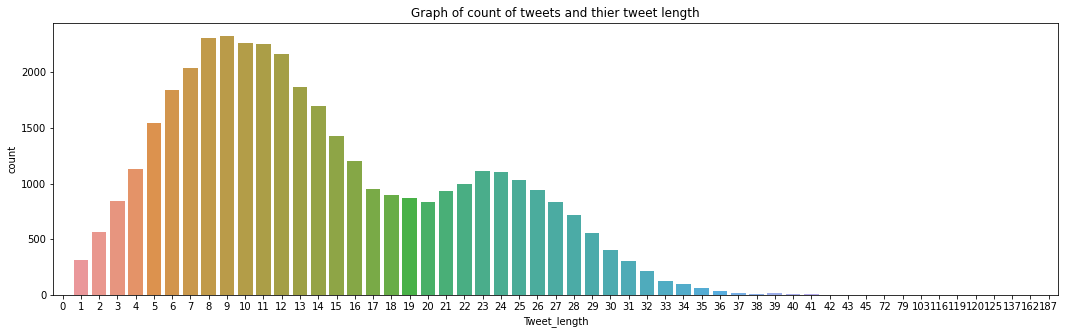

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
# Using countplot
ax = sns.countplot(x='tweet_length', data=basic_clean_df)
plt.title('Graph of count of tweets and thier tweet length')
plt.ylabel('count')
plt.xlabel('Tweet_length')
plt.show()

From the above graph, we can see the distribution of length of cleaned tweets.

So, removing tweets of length greater than 100 and less than 1.

In [ ]:
basic_clean_df = basic_clean_df[(basic_clean_df['tweet_length'] <= 100) & (basic_clean_df['tweet_length'] >0)]

In [ ]:
basic_clean_df.shape

(38851, 3)

In [ ]:
max_length = np.max(basic_clean_df['tweet_length'])
print("Maximum length of tweet:",max_length)

Maximum length of tweet: 79


## Proceeding towards Stemming and Lemmatization techniques.

For further cleaning in this section, we will be generating three columns.

1.   Stemming of basic cleaned tweets
2.   Lemmatization of basic cleaned tweets
3.   Lemmatization followed by Stemming of cleaned tweets.

We will select one techinique from above three based on thier performance.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer,PorterStemmer

def stemming(text):
  tokenized = nltk.word_tokenize(text)
  ps = PorterStemmer()
  return ' '.join([ps.stem(words) for words in tokenized])


def lemmatize(text):
  tokenized = nltk.word_tokenize(text)
  lm = WordNetLemmatizer()
  return ' '.join([lm.lemmatize(words) for words in tokenized])

Using above functions to do stemming and lemmatization on basic clean tweets

In [ ]:
# For stemming and lemmatization
stem_tweets = []
lemma_tweets = []
lemma_stem_tweets = [];

# For stemming and lemmatization
for text in basic_clean_df['Basic clean']:
  stem_tweets.append(stemming(text));      # Stemming
  lemma_tweets.append(lemmatize(text));    # Lemmatize

# For lemmatization followed by stemming
for text in lemma_tweets:
  lemma_stem_tweets.append(stemming(text));

Showing three results of Stemming, Lemmatization and Lemma+Stemming

In [ ]:
basic_clean_df['Stemming'] = stem_tweets;
basic_clean_df['Lemmatization'] = lemma_tweets;
basic_clean_df['Lemma_Stemming'] = lemma_stem_tweets;
basic_clean_df.head()

# We can see that in stemming is just removing last few characters of words.
# Whereas lemmatization is considering context of words and converting to its
# meaningful baseform.

,Basic clean,sentiment,tweet_length,Stemming,Lemmatization,Lemma_Stemming
0,words katandandre food crapilicious mkr,not_cyberbullying,5,word katandandr food crapilici mkr,word katandandre food crapilicious mkr,word katandandr food crapilici mkr
1,aussietv white mkr theblock today sunrise stud...,not_cyberbullying,10,aussietv white mkr theblock today sunris studi...,aussietv white mkr theblock today sunrise stud...,aussietv white mkr theblock today sunris studi...
2,classy whore red velvet cupcakes,not_cyberbullying,5,classi whore red velvet cupcak,classy whore red velvet cupcake,classi whore red velvet cupcak
3,meh p thanks heads concerned another angry dud...,not_cyberbullying,9,meh p thank head concern anoth angri dude twitter,meh p thanks head concerned another angry dude...,meh p thank head concern anoth angri dude twitter
4,isis account pretending kurdish account like i...,not_cyberbullying,8,isi account pretend kurdish account like islam...,isi account pretending kurdish account like is...,isi account pretend kurdish account like islam...


## Proceeding towards Word embeddings

For further processing, we will convert our results of - 

*   Stemming
*   Lemmatization
*   Lemmatization followed by stemming

to vectors.
To achieve this, we will be using following word-embeddings -


1.   Bag of words
2.   Tf-idf (Term Frequency-Inverse Document Frequency)
3.   GloVe word embedding
4.   Word2vec embedding


Before going for these, lets first split the dataset in training and testing.


importing libraries

In [ ]:
from sklearn.model_selection import train_test_split

Firstly, encoding the sentiment column.

In [ ]:
basic_clean_df['sentiment'] = basic_clean_df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

In [ ]:
basic_clean_df['sentiment'].value_counts()

0    7948
1    7897
2    7748
4    7645
3    7613
Name: sentiment, dtype: int64

Train/test split

In [ ]:
# For X - dropping sentiment column 
X = basic_clean_df.drop(columns='sentiment');
# y = sentiments
y = basic_clean_df['sentiment']
# Splitting 20% test and 80% train
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42);
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape);

(31080, 5) (7771, 5) (31080,) (7771,)


Defining different varaiables for Stemming,lemmatization and lemma_stem


In [ ]:
# For training -
X_stem_train = X_train['Stemming']
X_lemma_train = X_train['Lemmatization']
X_lemmaStem_train = X_train['Lemma_Stemming']

# For testing -
X_stem_test = X_test['Stemming']
X_lemma_test = X_test['Lemmatization']
X_lemmaStem_test = X_test['Lemma_Stemming']


print(X_stem_train.shape,X_lemma_train.shape,X_lemmaStem_train.shape)
print(X_stem_test.shape,X_lemma_test.shape,X_lemmaStem_test.shape)

(31080,) (31080,) (31080,)
(7771,) (7771,) (7771,)


Now, we will use above vairables for different embedings.

### Bag of words

importing CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Creating objects of CountVectorizer

In [ ]:
bow1 = CountVectorizer();
bow2 = CountVectorizer();
bow3 = CountVectorizer();
# for stemming
bow_cv1 = bow1.fit_transform(X_stem_train);
# for lemmatization
bow_cv2 = bow2.fit_transform(X_lemma_train);
# for lemma-stemming
bow_cv3 = bow3.fit_transform(X_lemmaStem_train);

print(bow_cv1.shape);
print(bow_cv2.shape);
print(bow_cv3.shape);

(31080, 29165)
(31080, 34843)
(31080, 29071)


### Tf-idf (Term Frequency-Inverse Document Frequency)

importing TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

Creating objects of TfidfTransformer

In [ ]:
tfid1 = TfidfTransformer(use_idf=True).fit(bow_cv1)
tfid2 = TfidfTransformer(use_idf=True).fit(bow_cv2)
tfid3 = TfidfTransformer(use_idf=True).fit(bow_cv3)
# for stemming
tf_cv1 = tfid1.transform(bow_cv1);
# for lemmatization
tf_cv2 = tfid2.transform(bow_cv2);
# for lemma-stemming
tf_cv3 = tfid3.transform(bow_cv3);

print(tf_cv1.shape);
print(tf_cv2.shape);
print(tf_cv3.shape);

(31080, 29165)
(31080, 34843)
(31080, 29071)


# Baseline technique - Naive Bayes

### importing multinomial naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

## Transforming set testing for different word embeddings


In [ ]:
# For Bag of words - 
bow_cv1_test = bow1.transform(X_stem_test)
bow_cv2_test = bow2.transform(X_lemma_test)
bow_cv3_test = bow3.transform(X_lemmaStem_test)

# For Tf-idf
tf_cv1_test = tfid1.transform(bow_cv1_test);
tf_cv2_test = tfid2.transform(bow_cv2_test);
tf_cv3_test = tfid3.transform(bow_cv3_test);


print(bow_cv1_test.shape,bow_cv2_test.shape,bow_cv3_test.shape);
print(tf_cv1_test.shape,tf_cv2_test.shape,tf_cv3_test.shape);

(7771, 29165) (7771, 34843) (7771, 29071)
(7771, 29165) (7771, 34843) (7771, 29071)


## Creating models

In [ ]:
# For bag of words - 
nb_bow_stem = MultinomialNB();
nb_bow_lemma = MultinomialNB();
nb_bow_lemmaStem = MultinomialNB();

# for tf-idf - 
nb_tf_stem = MultinomialNB();
nb_tf_lemma = MultinomialNB();
nb_tf_lemmaStem = MultinomialNB();

## Training the models 

In [ ]:
# For bag of words - 
nb_bow_stem.fit(bow_cv1,y_train);
nb_bow_lemma.fit(bow_cv2,y_train);
nb_bow_lemmaStem.fit(bow_cv3,y_train);

# For tf-idf - 
nb_tf_stem.fit(tf_cv1,y_train);
nb_tf_lemma.fit(tf_cv1,y_train);
nb_tf_lemmaStem.fit(tf_cv1,y_train);

## Predicting - 

In [ ]:
# For bag of words - 
nb_bow_stem_pred = nb_bow_stem.predict(bow_cv1_test);
nb_bow_lemma_pred = nb_bow_lemma.predict(bow_cv2_test);
nb_bow_lemmaStem_pred = nb_bow_lemmaStem.predict(bow_cv3_test);

# For tf-idf - 
nb_tf_stem_pred = nb_tf_stem.predict(tf_cv1_test);
nb_tf_lemma_pred = nb_tf_lemma.predict(tf_cv1_test);
nb_tf_lemmaStem_pred = nb_tf_lemmaStem.predict(tf_cv1_test);

## Evaluation metrics

Importing evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Printing reports

In [ ]:
# For Bag of words - 
print('Classification Report for Naive Bayes on bag of word with stemming:\n',classification_report(y_test, nb_bow_stem_pred))
print('Classification Report for Naive Bayes on bag of word with lemmatization:\n',classification_report(y_test, nb_bow_lemma_pred))
print('Classification Report for Naive Bayes on bag of word with lemma_stemming:\n',classification_report(y_test, nb_bow_lemmaStem_pred))


# For Tf-idf - 
print('Classification Report for Naive Bayes on Ti-idf with stemming:\n',classification_report(y_test, nb_tf_stem_pred))
print('Classification Report for Naive Bayes on Ti-idf with lemmatization:\n',classification_report(y_test, nb_tf_lemma_pred))
print('Classification Report for Naive Bayes on Ti-idf with lemma_stemming:\n',classification_report(y_test, nb_tf_lemmaStem_pred))

Classification Report for Naive Bayes on bag of word with stemming:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1590
           1       0.81      0.99      0.89      1579
           2       0.90      0.95      0.92      1550
           3       0.87      0.84      0.86      1523
           4       0.86      0.48      0.61      1529

    accuracy                           0.85      7771
   macro avg       0.85      0.85      0.84      7771
weighted avg       0.85      0.85      0.84      7771

Classification Report for Naive Bayes on bag of word with lemmatization:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1590
           1       0.82      0.99      0.89      1579
           2       0.90      0.96      0.93      1550
           3       0.87      0.85      0.86      1523
           4       0.86      0.48      0.61      1529

    accuracy                           0.8

## Further cleaning and visualization

From the optimization point of view, we are going for stemming.

In [ ]:
data['clean_tweets'] = stem_tweets
data.head()

,tweet,sentiment,clean_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...


In [ ]:
data.shape

(47656, 3)

In [ ]:
data.to_csv('pre-processed-tweets.csv')
!cp pre-processed-tweets.csv "gdrive/My Drive/"